In [7]:
import matplotlib.pyplot as plt
import csv

In [8]:
def modular_pow(base, exp, mod):
    result = 1
    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        base = (base * base) % mod
        exp //= 2
    return result

def quadratic_residues(p):
    residues = {}
    for y in range(p):
        residues[y] = (y ** 2) % p
    return residues

def elliptic_curve_table(p, a, b):
    table = {}
    for x in range(p):
        rhs = (x**3 + a * x + b) % p
        table[x] = rhs
    return table

In [9]:
#Nim saya adalah 21830608
p = 6  # Bilangan prima (dari 06)
b = 8  # Bilangan untuk b (dari 08)
a = 21 % p  # Dari pesan Nim, dikonversi ke modulo p

In [10]:
# Menghitung residu kuadratis
residues = quadratic_residues(p)
with open("residu_kuadratis.txt", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["y", "y^2"])
    for y, r in residues.items():
        writer.writerow([y, r])
# Menghitung tabel y^2 untuk kurva eliptik
elliptic_table = elliptic_curve_table(p, a, b)
with open("tabel_elliptic.txt", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x", "y^2"])
    for x, y_squared in elliptic_table.items():
        writer.writerow([x, y_squared])


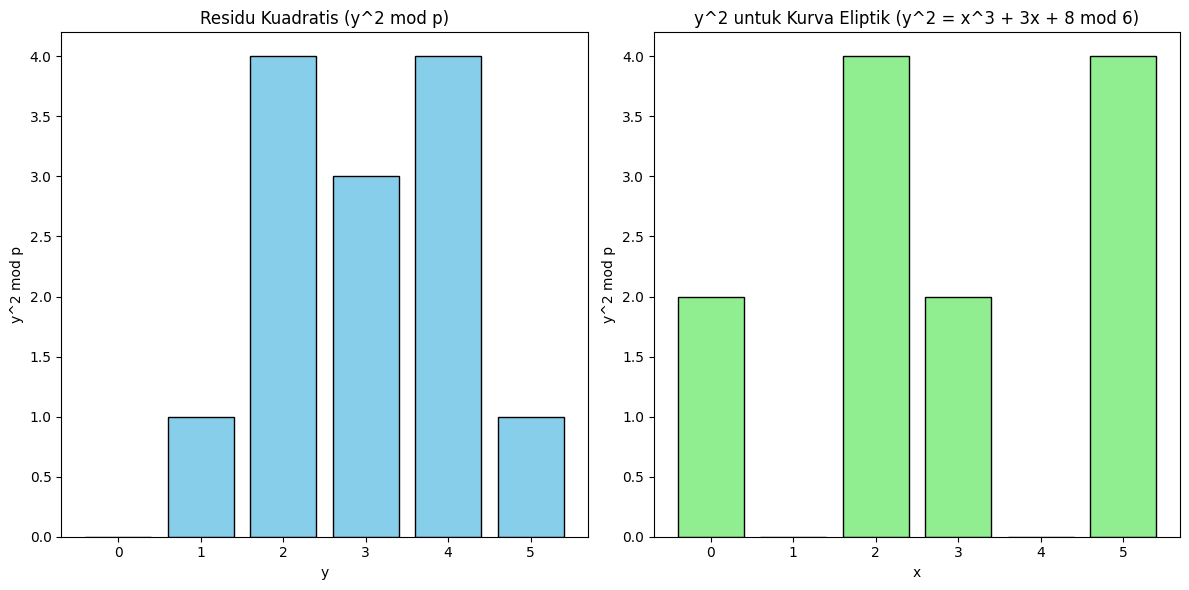

In [11]:
# Visualisasi Residu Kuadratis
residues_x = list(residues.keys())
residues_y = list(residues.values())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(residues_x, residues_y, color='skyblue', edgecolor='black')
plt.title("Residu Kuadratis (y^2 mod p)")
plt.xlabel("y")
plt.ylabel("y^2 mod p")
plt.xticks(range(p))

# Visualisasi Tabel y^2 Kurva Eliptik
elliptic_x = list(elliptic_table.keys())
elliptic_y = list(elliptic_table.values())

plt.subplot(1, 2, 2)
plt.bar(elliptic_x, elliptic_y, color='lightgreen', edgecolor='black')
plt.title(f"y^2 untuk Kurva Eliptik (y^2 = x^3 + {a}x + {b} mod {p})")
plt.xlabel("x")
plt.ylabel("y^2 mod p")
plt.xticks(range(p))

plt.tight_layout()
plt.show()
